intercept: 1.452764411640314
slope: [0.00406196]


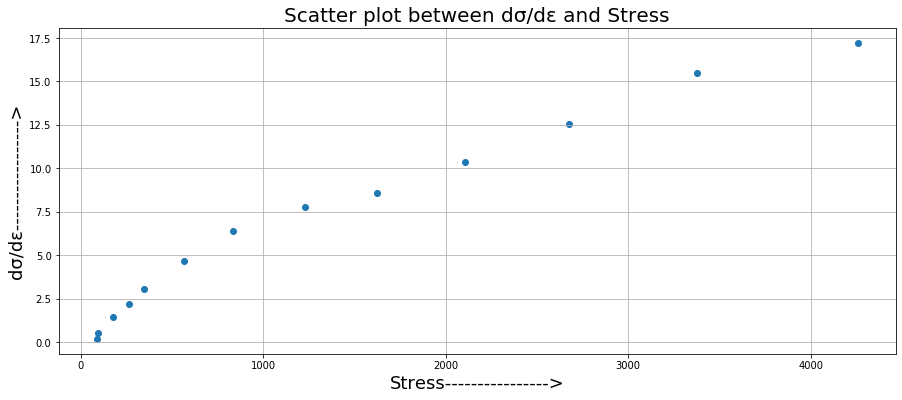

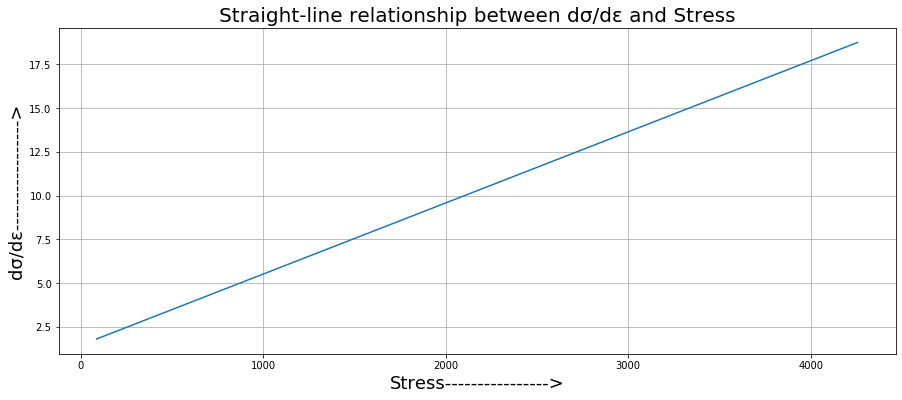

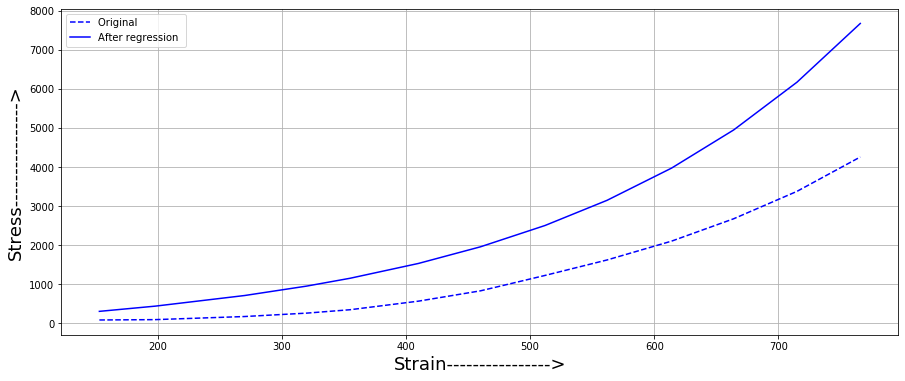

In [18]:
#Question4
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.linear_model import LinearRegression
ss=[87.8,96.6,176,263,350,569,833,1227,1623,2105,2677,3378,4257]
sn=[153,198,270,320,355,410,460,512,562,614,664,715,766]
dss=np.gradient(ss,sn)

X = [(ss[i]) for i in range(0, len(ss))]
X = np.reshape(X, (len(X), 1))
y = dss
model = LinearRegression()
model.fit(X, y)
E0= model.intercept_
a= model.coef_
print('intercept:', E0 )
print('slope:', a)
y1= model.coef_*X+ model.intercept_

plt.figure(figsize=(15, 6))
plt.grid()
plt.scatter(X, y)
plt.title("Scatter plot between dσ/dε and Stress",fontsize=20)
plt.xlabel("Stress---------------->",fontsize=18)
plt.ylabel("dσ/dε----------------->",fontsize=18)
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(X, y1)
plt.title("Straight-line relationship between dσ/dε and Stress",fontsize=20)
plt.xlabel("Stress---------------->",fontsize=18)
plt.ylabel("dσ/dε----------------->",fontsize=18)
plt.show()
ss1=E0*(pow(m.e,a*sn)-1)/a
plt.figure(figsize=(15, 6))
plt.plot(sn, ss, '--b', label='Original ')
plt.plot(sn, ss1,'-b', label='After regression ' )
plt.xlabel("Strain---------------->",fontsize=18)
plt.ylabel("Stress---------------->",fontsize=18)
plt.legend(loc='upper left')
plt.grid()
plt.show()


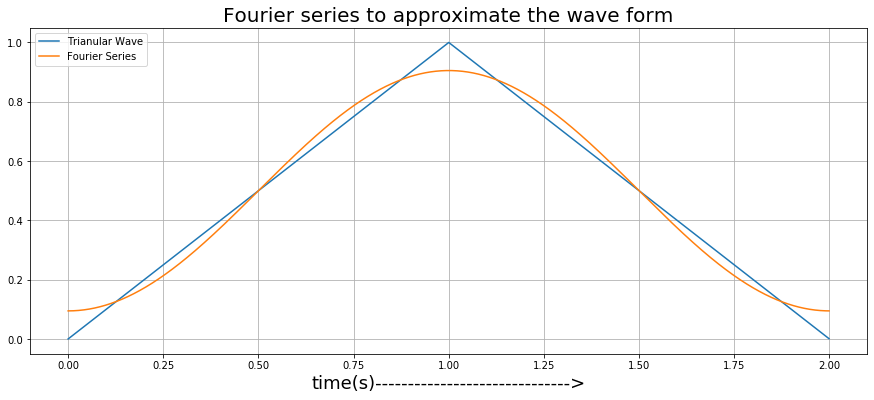

In [5]:
#Question2
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t=np.arange(0,2,0.001)
s=0
s1=0
s2=0
Y=[]
Y1=[]
for i in range(len(t)):
    if(t[i]<=1):
        y=t[i]
        Y.append(y)
    else:
        y=2-t[i]
        Y.append(y)
    s=s+y
    s1=s1+y*m.cos(2*m.pi/2*t[i])
    s2=s2+y*m.sin(2*m.pi/2*t[i])
a0=s/(len(t))
a1=2*s1/(len(t))
a2=2*s2/(len(t))
for i in range(len(t)):
    y1=a0+a1*m.cos(2*m.pi/2*t[i])+a2*m.sin(2*m.pi/2*t[i])
    Y1.append(y1)

plt.figure(figsize=(15, 6))
plt.plot(t,Y,label='Trianular Wave')
plt.title("Fourier series to approximate the wave form",fontsize=20)
plt.xlabel("time(s)------------------------------>",fontsize=18)
plt.plot(t,Y1,label='Fourier Series')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
#Question3
import numpy as np
import math as m
from scipy.integrate import quad
def fn(y):
    a=((1.6*y-0.045*y*y)*(m.cos(0.8+0.125*y-0.009*y*y+0.0002*y*y*y)))
    return a
p=0
q=30
si1=0
si2=0
X=[]
H=[]
Y=[]

n=[4,8,16]
for i in range(len(n)):
    h=((q-p)/n[i])
    H.append(h)

for i in range(sum(n)+len(n)):
    if(i<=n[0]):
        x=p+i*H[0]
        X.append(x)
        Y.append(fn(X[i]))
    s=sum(Y)
   
    S=((s-p-q)*2+(p+q))*H[0]/2

        
    if(i>n[0] and i<=((n[1]+n[0]+1))):
        x=p+(i-n[0]-1)*H[1]
        X.append(x)
        Y.append(fn(X[i]))
    s1=sum(Y)
    
    S1=((s1-p-q)*2+(p+q))*H[1]/2
   
   
    if(i>(n[1]+n[0]+1)):
        x=p+(i-n[1]-n[0]-2)*H[2]
        X.append(x)
        Y.append(fn(X[i]))
        if(i%2==0):
            si2=si2+Y[i]
        else:
            si1=si1+Y[i]
    
    s2=sum(Y)
    S2=((s2-p-q)*2+(p+q))*H[2]/2
    
    Si=((4*si1+2*si2-2*p-4*q)+(p+q))*H[2]/3
k=[S,S1,S2]
k1=[]
for i in range(len(k)-1):
    r1=(4*k[i+1]-k[i])/3
    k1.append(r1)

for j in range(len(k1)-1):
    r11=(4*4*k1[j+1]-k1[j])/(4*4-1)
RI=r11
QI= quad(fn,0,30)

print("Trapezoidal 4:",S)
print("Trapezoidal 8:",S1)
print("Trapezoidal 16:",(S2))
print("Simpson1/3rd:",(Si))
print("Romberg:",RI)    
print("Quadrature:",QI[0]) 

Trapezoidal 4: 333.9419372826488
Trapezoidal 8: 166.9709686413244
Trapezoidal 16: 79.60999647469248
Simpson1/3rd: 9.38399933537907
Romberg: 46.43471864081066
Quadrature: 66.9220721329676


In [7]:
#Question 1
import numpy as np
a = float(input("Enter the value of 𝜎𝑥𝑥 tensile(+) or compressive(-) stress in MPa: "))
d = float(input("Enter the value of 𝜎y𝑦 tensile(+) or compressive(-) stress in MPa: "))
f = float(input("Enter the value of 𝜎zz tensile(+) or compressive(-) stress in MPa: "))
b = float(input("Enter the value of shear stress 𝜎x𝑦 in MPa: "))
c = float(input("Enter the value of shear stress 𝜎x𝑧 in MPa: "))
e = float(input("Enter the value of shear stress 𝜎y𝑧 in MPa: "))
m = np.matrix([[a,b,c],[b,d,e],[c,e,f]])
print('Stress Matrix\n',m*10**6)
p0 = 1
p1 = (-(a+d+f))*(10**6)
#print(p1)
p2 = (a*d +d*f +f*a -b**2-c**2-e**2)*(10**12)
#print(p2)
p3 = (-(a*d*f -a*e**2 -d*c**2 -f*b**2 +2*b*c*e))*(10**18)
#print(p3)
coeff = [p0,p1,p2,p3]
l = np.roots(coeff)
r = np.sort(l)
print("\nThe first principle stress = ",r[2])
print("The second principle stress = ",r[1])
print("The third principle stress = ",r[0])

Enter the value of 𝜎𝑥𝑥 tensile(+) or compressive(-) stress in MPa: 10
Enter the value of 𝜎y𝑦 tensile(+) or compressive(-) stress in MPa: 7
Enter the value of 𝜎zz tensile(+) or compressive(-) stress in MPa: 16
Enter the value of shear stress 𝜎x𝑦 in MPa: 14
Enter the value of shear stress 𝜎x𝑧 in MPa: 25
Enter the value of shear stress 𝜎y𝑧 in MPa: 15
Stress Matrix
 [[10000000. 14000000. 25000000.]
 [14000000.  7000000. 15000000.]
 [25000000. 15000000. 16000000.]]

The first principle stress =  48354283.92540503
The second principle stress =  -3150210.9586811676
The third principle stress =  -12204072.966723874
